IMPORT LIBRARIES

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,mean_squared_error

# import warnings
import warnings
warnings.filterwarnings('ignore')



IMPORT DATASET

In [2]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
# Specify the encoding as 'latin1' or any other encoding that works for your file
df = pd.read_csv('MoviesDataset.csv', encoding='latin1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor-1,Actor-2,Actor-3
0,-,--,--,Drama,--,--,J.S.-Randhawa,Manmauji,Birbal,Rajendra-Bhatia
1,#Gadhvi-(He-thought-he-was-Gandhi),2019,109-min,Drama,7,8,Gaurav-Bakshi,Rasika-Dugal,Vivek-Ghamande,Arvind-Jangid
2,#Homecoming,2021,90-min,"Drama,-Musical",--,--,Soumyajit-Majumdar,Sayani-Gupta,Plabita-Borthakur,Roy-Angana
3,#Yaaram,2021,110-min,"Comedy,-Romance",4.4,35,Ovais-Khan,Prateik,Ishita-Raj,Siddhant-Kapoor
4,...And-Once-Again,2021,105-min,Drama,--,--,Amol-Palekar,Rajat-Kapoor,Rituparna-Sengupta,Antara-Mali
...,...,...,...,...,...,...,...,...,...,...
15506,Zulmi-Raj,2021,--,Action,--,--,Kiran-Thej,Sangeeta-Tiwari,--,--
15507,Zulmi-Shikari,2021,--,Action,--,--,--,--,--,--
15508,Zulm--O--Sitam,2021,130-min,"Action,-Drama",6.2,20,K.C.-Bokadia,Dharmendra,Jaya-Prada,Arjun-Sarja
15509,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor-1,Actor-2,Actor-3
0,-,--,--,Drama,--,--,J.S.-Randhawa,Manmauji,Birbal,Rajendra-Bhatia
1,#Gadhvi-(He-thought-he-was-Gandhi),2019,109-min,Drama,7,8,Gaurav-Bakshi,Rasika-Dugal,Vivek-Ghamande,Arvind-Jangid
2,#Homecoming,2021,90-min,"Drama,-Musical",--,--,Soumyajit-Majumdar,Sayani-Gupta,Plabita-Borthakur,Roy-Angana
3,#Yaaram,2021,110-min,"Comedy,-Romance",4.4,35,Ovais-Khan,Prateik,Ishita-Raj,Siddhant-Kapoor
4,...And-Once-Again,2021,105-min,Drama,--,--,Amol-Palekar,Rajat-Kapoor,Rituparna-Sengupta,Antara-Mali


In [4]:
df.describe()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor-1,Actor-2,Actor-3
count,15509,15511,15509,15509,15509,15509,15509,15509,15509,15509
unique,13838,3,183,486,85,2035,5939,4719,4892,4821
top,Anjaam,2021,--,Drama,--,--,--,--,--,--
freq,7,15509,8269,2780,7590,7589,525,1617,2384,3144


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15511 entries, 0 to 15510
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      15509 non-null  object
 1   Year      15511 non-null  object
 2   Duration  15509 non-null  object
 3   Genre     15509 non-null  object
 4   Rating    15509 non-null  object
 5   Votes     15509 non-null  object
 6   Director  15509 non-null  object
 7   Actor-1   15509 non-null  object
 8   Actor-2   15509 non-null  object
 9   Actor-3   15509 non-null  object
dtypes: object(10)
memory usage: 1.2+ MB


DATA FILTERING AND PREPROCESSING

In [6]:
attribute = df.columns
print(attribute)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor-1', 'Actor-2', 'Actor-3'],
      dtype='object')


In [7]:
df.isnull().sum()

Name        2
Year        0
Duration    2
Genre       2
Rating      2
Votes       2
Director    2
Actor-1     2
Actor-2     2
Actor-3     2
dtype: int64

In [8]:
shape = df.shape
print(f"Nunmbers of rows:{shape[0]},Number of columns:{shape[1]}")

Nunmbers of rows:15511,Number of columns:10


In [9]:
unique_genres = df['Genre'].unique()
print("Unique Genres:",unique_genres)

Unique Genres: ['Drama' 'Drama,-Musical' 'Comedy,-Romance' 'Comedy,-Drama,-Musical'
 'Drama,-Romance,-War' 'Documentary' 'Horror,-Mystery,-Thriller'
 'Action,-Crime,-Thriller' 'Horror' 'Horror,-Romance,-Thriller'
 'Comedy,-Drama,-Romance' 'Thriller' 'Comedy,-Drama' '--'
 'Comedy,-Drama,-Fantasy' 'Comedy,-Drama,-Family' 'Crime,-Drama,-Mystery'
 'Horror,-Thriller' 'Biography' 'Comedy,-Horror' 'Action'
 'Drama,-Horror,-Mystery' 'Comedy' 'Action,-Thriller' 'Drama,-History'
 'Drama,-History,-Sport' 'Horror,-Mystery,-Romance' 'Horror,-Mystery'
 'Drama,-Horror,-Romance' 'Action,-Drama,-History' 'Action,-Drama,-War'
 'Comedy,-Family' 'Adventure,-Horror,-Mystery' 'Action,-Sci--Fi'
 'Crime,-Mystery,-Thriller' 'War' 'Sport' 'Biography,-Drama,-History'
 'Horror,-Romance' 'Crime,-Drama' 'Drama,-Romance' 'Adventure,-Drama'
 'Comedy,-Mystery,-Thriller' 'Action,-Crime,-Drama' 'Crime,-Thriller'
 'Horror,-Sci--Fi,-Thriller' 'Crime,-Drama,-Thriller'
 'Drama,-Mystery,-Thriller' 'Drama,-Sport' 'Drama,-Fami

In [10]:
if 'Rating' in df.columns:
    rating_dist = df['Rating'].value_counts()
    print("Rating Distribution:\n", rating_dist)
else:
    print("The 'Rating' column does not exist in the DataFrame.")

Rating Distribution:
 Rating
--     7590
6.2     269
6.8     264
6.5     254
6.6     239
       ... 
9.7       1
1.4       1
10        1
9.6       1
1.1       1
Name: count, Length: 85, dtype: int64


In [11]:
rating_dist = df['Rating'].value_counts()
print("Rating Distribution:\n",rating_dist)

Rating Distribution:
 Rating
--     7590
6.2     269
6.8     264
6.5     254
6.6     239
       ... 
9.7       1
1.4       1
10        1
9.6       1
1.1       1
Name: count, Length: 85, dtype: int64


In [12]:
df.drop_duplicates(inplace= True)

In [13]:
attributes = ['Name','Year','Duration','Votes','Rating']
df.dropna(subset = attributes, inplace = True)
missing_val = df.isna().sum()
print(missing_val)

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor-1     0
Actor-2     0
Actor-3     0
dtype: int64


In [14]:
df


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor-1,Actor-2,Actor-3
0,-,--,--,Drama,--,--,J.S.-Randhawa,Manmauji,Birbal,Rajendra-Bhatia
1,#Gadhvi-(He-thought-he-was-Gandhi),2019,109-min,Drama,7,8,Gaurav-Bakshi,Rasika-Dugal,Vivek-Ghamande,Arvind-Jangid
2,#Homecoming,2021,90-min,"Drama,-Musical",--,--,Soumyajit-Majumdar,Sayani-Gupta,Plabita-Borthakur,Roy-Angana
3,#Yaaram,2021,110-min,"Comedy,-Romance",4.4,35,Ovais-Khan,Prateik,Ishita-Raj,Siddhant-Kapoor
4,...And-Once-Again,2021,105-min,Drama,--,--,Amol-Palekar,Rajat-Kapoor,Rituparna-Sengupta,Antara-Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm-Ko-Jala-Doonga,2021,--,Action,4.6,11,Mahendra-Shah,Naseeruddin-Shah,Sumeet-Saigal,Suparna-Anand
15505,Zulmi,2021,129-min,"Action,-Drama",4.5,655,Kuku-Kohli,Akshay-Kumar,Twinkle-Khanna,Aruna-Irani
15506,Zulmi-Raj,2021,--,Action,--,--,Kiran-Thej,Sangeeta-Tiwari,--,--
15507,Zulmi-Shikari,2021,--,Action,--,--,--,--,--,--


In [15]:
movie_name_rating = df[['Name','Rating']]
print(movie_name_rating.head())

                                 Name Rating
0                                   -     --
1  #Gadhvi-(He-thought-he-was-Gandhi)      7
2                         #Homecoming     --
3                             #Yaaram    4.4
4                   ...And-Once-Again     --


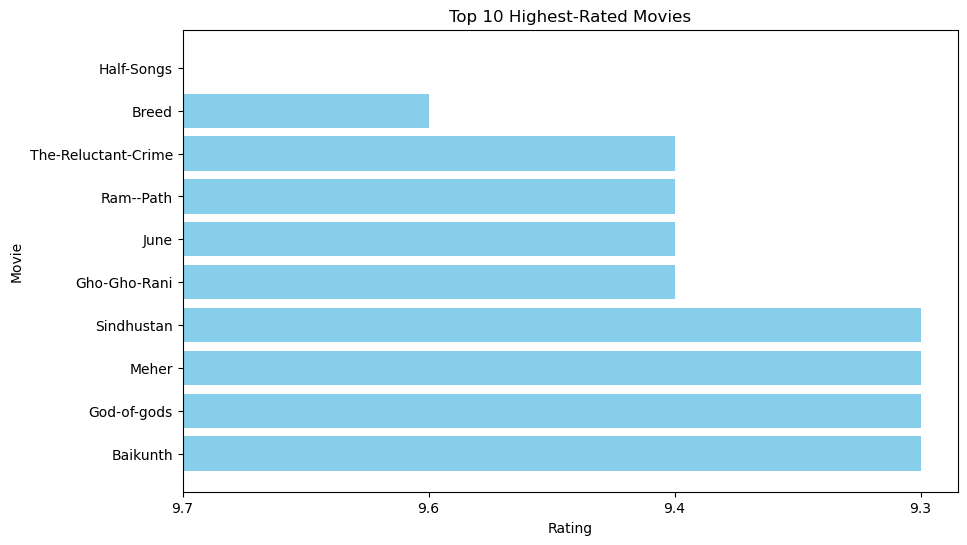

In [16]:
top_rated_movies = df.sort_values(by ='Rating', ascending = False).head(10)
plt.figure(figsize = (10,6))
plt.barh(top_rated_movies['Name'],top_rated_movies['Rating'], color ='skyblue')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 Highest-Rated Movies')
plt.gca().invert_yaxis()
plt.show()

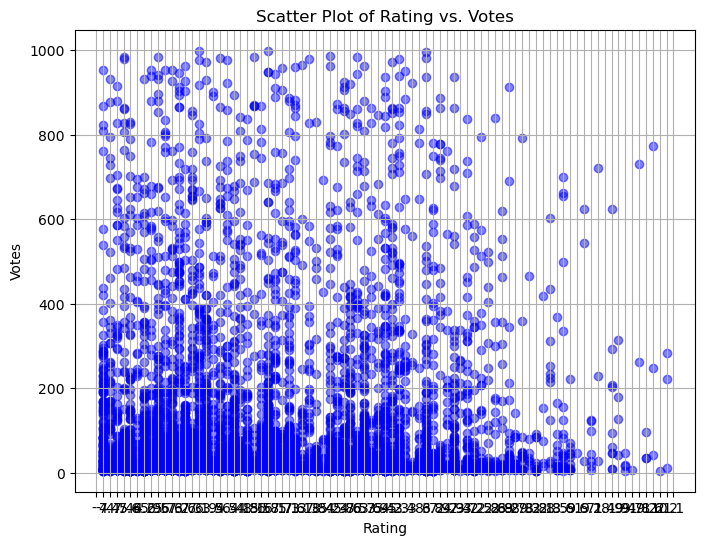

In [17]:
df['Votes'] = pd.to_numeric(df['Votes'],errors = 'coerce')
plt.figure(figsize=( 8,6))
plt.scatter(df['Rating'],df['Votes'],alpha = 0.5, color ='b')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter Plot of Rating vs. Votes')
plt.grid(True)
plt.show()

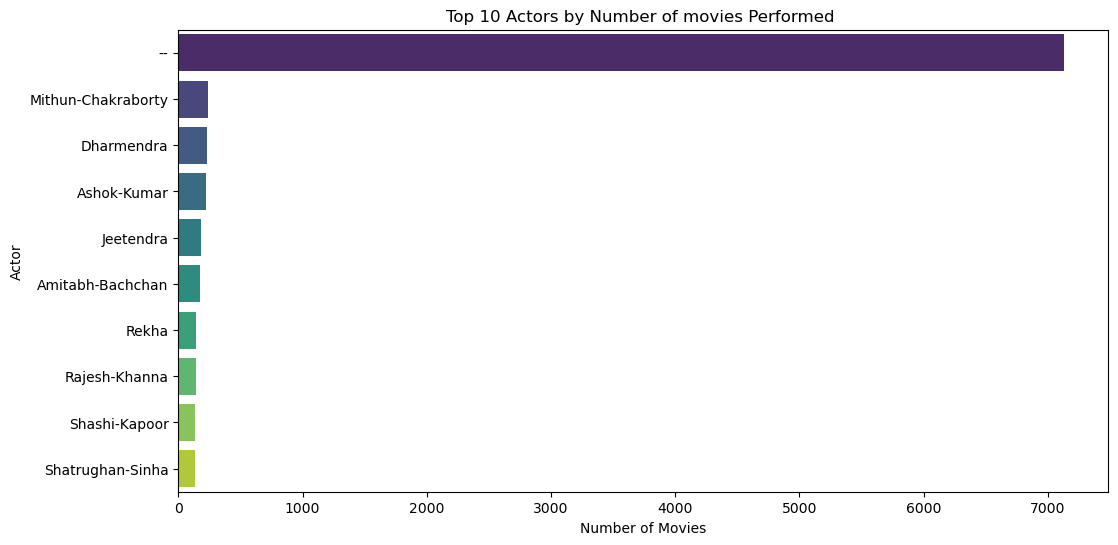

In [18]:
actors = pd.concat([df['Actor-1'],df['Actor-2'],df['Actor-3']])
actor_counts = actors.value_counts().reset_index()
actor_counts.columns =['Actor','Number of Movies']
plt.figure(figsize = (12,6))
sns.barplot(x = 'Number of Movies', y = 'Actor',data = actor_counts.head(10),palette = 'viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of movies Performed ')
plt.show()

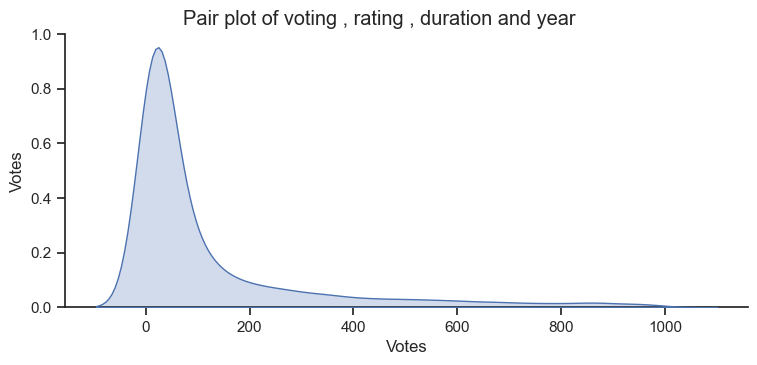

In [19]:
columns_of_interest = ['Votes', 'Rating','Duration', 'Year']
sns.set(style = 'ticks')
sns.pairplot(df[columns_of_interest],diag_kind = 'kde', markers ='o' , palette = 'viridis', height = 3.5 ,aspect = 2.2)
plt.suptitle('Pair plot of voting , rating , duration and year', y = 1.02)
plt.show()

In [20]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Replace non-numeric values with NaN
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix after replacing non-numeric values with NaN
correlation_matrix = df[numerical_columns].corr()

# Now you can visualize the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


NameError: name 'numerical_columns' is not defined

FEATURE ENGINEERING

In [21]:
df_sorted = df.sort_values(by='Votes', ascending=False)
df_sorted['Votes_Count_Percentile'] = df_sorted['Votes'].rank(pct=True) * 100
df_sorted.reset_index(drop=True, inplace=True)
print(df_sorted[['Name', 'Votes', 'Votes_Count_Percentile']])


                                       Name  Votes  Votes_Count_Percentile
0      Satyam-Shivam-Sundaram:-Love-Sublime  999.0              100.000000
1                                Hera-Pheri  998.0               99.984728
2                               Kurukshetra  996.0               99.969456
3                               Dishkiyaoon  986.0               99.954184
4                                Kadvi-Hawa  985.0               99.931277
...                                     ...    ...                     ...
15495                         Zulm-Ka-Jawab    NaN                     NaN
15496                       Zulm-Ka-Muqabla    NaN                     NaN
15497                         Zulm-Ki-Pukar    NaN                     NaN
15498                             Zulmi-Raj    NaN                     NaN
15499                         Zulmi-Shikari    NaN                     NaN

[15500 rows x 3 columns]


In [22]:
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor-1,Actor-2,Actor-3
0,-,--,--,Drama,--,NaN,J.S.-Randhawa,Manmauji,Birbal,Rajendra-Bhatia
1,#Gadhvi-(He-thought-he-was-Gandhi),2019,109-min,Drama,7,8.0,Gaurav-Bakshi,Rasika-Dugal,Vivek-Ghamande,Arvind-Jangid
2,#Homecoming,2021,90-min,"Drama,-Musical",--,NaN,Soumyajit-Majumdar,Sayani-Gupta,Plabita-Borthakur,Roy-Angana
3,#Yaaram,2021,110-min,"Comedy,-Romance",4.4,35.0,Ovais-Khan,Prateik,Ishita-Raj,Siddhant-Kapoor
4,...And-Once-Again,2021,105-min,Drama,--,NaN,Amol-Palekar,Rajat-Kapoor,Rituparna-Sengupta,Antara-Mali


In [23]:
df = df.dropna(subset = ['Votes'])
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor-1,Actor-2,Actor-3
1,#Gadhvi-(He-thought-he-was-Gandhi),2019,109-min,Drama,7,8.0,Gaurav-Bakshi,Rasika-Dugal,Vivek-Ghamande,Arvind-Jangid
3,#Yaaram,2021,110-min,"Comedy,-Romance",4.4,35.0,Ovais-Khan,Prateik,Ishita-Raj,Siddhant-Kapoor
5,...Aur-Pyaar-Ho-Gaya,2021,147-min,"Comedy,-Drama,-Musical",4.7,827.0,Rahul-Rawail,Bobby-Deol,Aishwarya-Rai-Bachchan,Shammi-Kapoor
8,?:-A-Question-Mark,2021,82-min,"Horror,-Mystery,-Thriller",5.6,326.0,Allyson-Patel,Yash-Dave,Muntazir-Ahmad,Kiran-Bhatia
9,@Andheri,2021,116-min,"Action,-Crime,-Thriller",4,11.0,Biju-Bhaskar-Nair,Augustine,Fathima-Babu,Byon


MODEL TRAINING AND TESTING

In [24]:
 df['Year'] = df['Year'].astype(str)
df['Duration'] = df['Duration'].astype(str)
df['Year']=df['Year'].str.extract('(\d+)').astype(float)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)
x = df[['Year','Duration','Votes']]
y = df['Rating']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [25]:
model = LinearRegression()


In [26]:

from sklearn.linear_model import LinearRegression

# Instantiate the imputer with a strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
x_train_imputed = imputer.fit_transform(x_train)

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model on the imputed training data
model.fit(x_train_imputed, y_train)


LinearRegression()

In [27]:
# Instantiate the imputer with a strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your test data
x_test_imputed = imputer.fit_transform(x_test)

# Now, you can make predictions
y_pred = model.predict(x_test_imputed)


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)
print(f" Mean Absolute Error: {mae}")
print(f" Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")



 Mean Absolute Error: 1.1087191107181498
 Root Mean Squared Error: 1.3537098666892724
R-squared (R2) Score: 0.0034437869498962215


PREDICTION IN VISUALIZATION FOR BETTER UNDERSTANDING

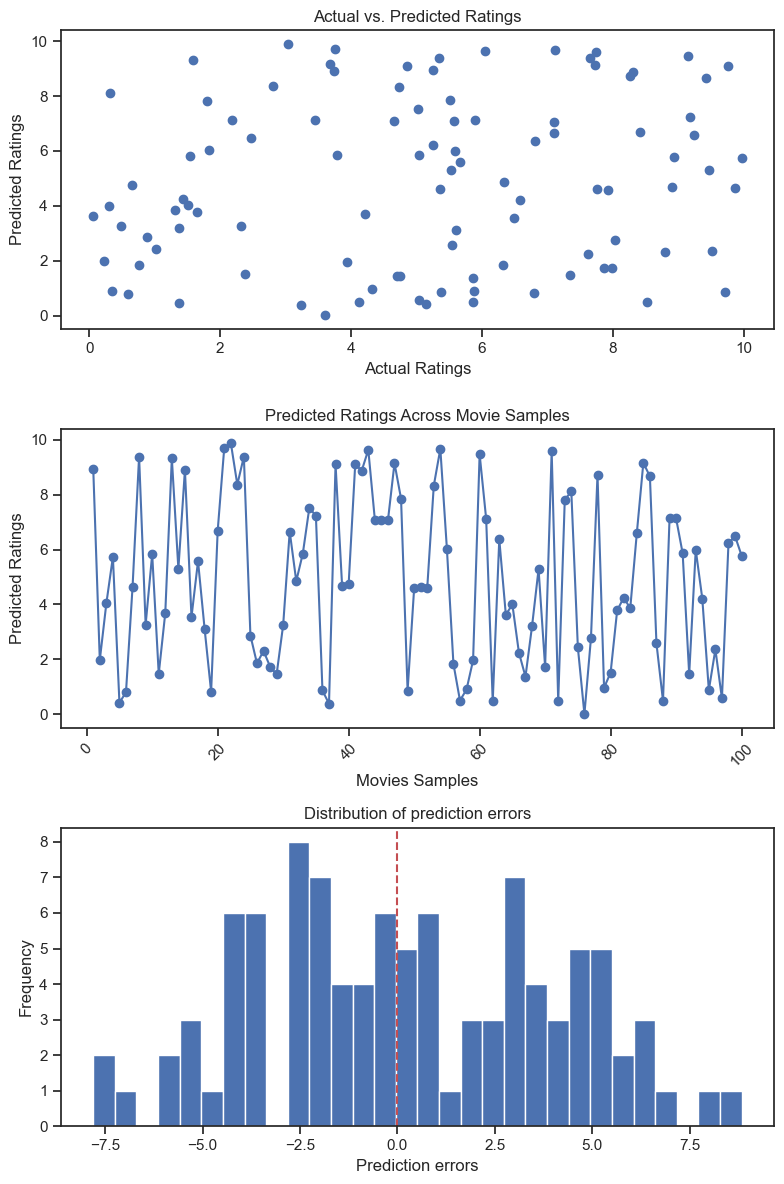

In [29]:
y_test = np.random.rand(100)* 10 
y_pred = np.random.rand(100)* 10 
errors = y_test - y_pred
fig, axs =plt.subplots(3,1, figsize = (8,12))

axs[0].scatter(y_test, y_pred)
axs[0].set_xlabel("Actual Ratings")
axs[0].set_ylabel("Predicted Ratings")
axs[0].set_title("Actual vs. Predicted Ratings")

#line plot
movie_samples = np.arange(1,len(y_pred)+1)
axs[1].plot(movie_samples, y_pred, marker = 'o', linestyle = '-')
axs[1].set_xlabel("Movies Samples")
axs[1].set_ylabel("Predicted Ratings")
axs[1].set_title("Predicted Ratings Across Movie Samples")
axs[1].tick_params(axis = 'x', rotation = 45)

#histogram
axs[2].hist(errors, bins = 30)
axs[2].set_xlabel("Prediction errors")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of prediction errors")
axs[2].axvline(x =0, color = 'r', linestyle = '--')
plt.tight_layout()
plt.show()
